<a href="https://colab.research.google.com/github/Leucocitokiller/Proyecto-Fina-NLP/blob/main/NLP_Jack_Reacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📚 Análisis NLP sobre texto de una novela.

In [19]:
import requests

# URL del archivo en GitHub (debe ser la URL raw)
url = 'https://raw.githubusercontent.com/Leucocitokiller/Proyecto-Fina-NLP/refs/heads/main/Zona%20peligrosa%20-%20Lee%20Child.txt'

# Descargar el contenido del archivo
response = requests.get(url)

# Verificar si la descarga fue exitosa
if response.status_code == 200:
    libro = response.text
    print("Archivo cargado correctamente.")
else:
    print("Hubo un error al cargar el archivo.")

# Mostrar las primeras 500 palabras del texto

print(libro[:500])


Archivo cargado correctamente.
1


Me detuvieron en la cafetería de Eno. A las doce del mediodía. Estaba comiendo unos huevos y bebiendo café. Un desayuno tardío, no un almuerzo. Estaba mojado y exhausto después de una larga caminata bajo la intensa lluvia. Desde la autopista hasta el límite municipal.

La cafetería era pequeña, pero limpia y luminosa. Nuevecita, construida a imitación de un vagón de tren. Estrecha, con una larga barra a un lado y una cocina encajonada al fondo. Una hilera de mesas con bancos de respaldo


## 🧠 Técnicas de NLP aplicadas

### **1. Tokenización**
### **Qué es:**
### Es el proceso de dividir un texto en unidades más pequeñas llamadas tokens (normalmente palabras).

### **Para qué sirve:**
### Permite analizar el texto palabra por palabra. Es el primer paso para casi todas las tareas de NLP.



In [20]:
# Tokenización
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('punkt_tab') # Download the missing punkt_tab dataset

tokens = word_tokenize(libro)



[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## **2. Lematización**
## **Qué es:**
## Consiste en reducir las palabras a su forma base o raíz (lema).
## Ejemplo: "corriendo", "corría", "corriste" → "correr".

## **Para qué sirve:**
## Ayuda a agrupar palabras similares para análisis más precisos. Muy útil en análisis de sentimientos, búsqueda de información o resumen automático.

In [21]:
# Lematización
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()
lemmas = [lemmatizer.lemmatize(word) for word in tokens]

# Ver los primeros 50 lemas
print(lemmas[:100])


[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


['1', 'Me', 'detuvieron', 'en', 'la', 'cafetería', 'de', 'Eno', '.', 'A', 'la', 'doce', 'del', 'mediodía', '.', 'Estaba', 'comiendo', 'unos', 'huevos', 'y', 'bebiendo', 'café', '.', 'Un', 'desayuno', 'tardío', ',', 'no', 'un', 'almuerzo', '.', 'Estaba', 'mojado', 'y', 'exhausto', 'después', 'de', 'una', 'larga', 'caminata', 'bajo', 'la', 'intensa', 'lluvia', '.', 'Desde', 'la', 'autopista', 'hasta', 'el', 'límite', 'municipal', '.', 'La', 'cafetería', 'era', 'pequeña', ',', 'pero', 'limpia', 'y', 'luminosa', '.', 'Nuevecita', ',', 'construida', 'a', 'imitación', 'de', 'un', 'vagón', 'de', 'tren', '.', 'Estrecha', ',', 'con', 'una', 'larga', 'barra', 'a', 'un', 'lado', 'y', 'una', 'cocina', 'encajonada', 'al', 'fondo', '.', 'Una', 'hilera', 'de', 'mesa', 'con', 'bancos', 'de', 'respaldo', 'alto', 'al']


## **3. Remoción de Stopwords**
## **Qué es:**
## Eliminar palabras muy comunes que no aportan mucho significado, como “y”, “el”, “pero”, “con”, etc.

## **Para qué sirve:**
## Reduce el ruido en el análisis y enfoca los modelos en palabras importantes para el contexto del texto.

In [22]:
# Eliminar stopwords
from nltk.corpus import stopwords
nltk.download('stopwords')

stop_words = set(stopwords.words('spanish'))  # O 'english' si está en inglés
tokens_filtrados = [word for word in tokens if word.lower() not in stop_words]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## **4. POS-tagging (Part-of-Speech Tagging)**
## **Qué es:**
## Es etiquetar cada palabra con su categoría gramatical: sustantivo, verbo, adjetivo, etc.

## **Para qué sirve:**
## Permite hacer análisis gramaticales y entender mejor la estructura del texto. Es útil en traducción automática, análisis sintáctico y generación de texto.

In [23]:
import spacy

# Download the model if it's not installed
!python -m spacy download es_core_news_sm # This line downloads the model

nlp = spacy.load("es_core_news_sm")

doc = nlp(libro)

# Lemas y POS por palabra
for token in doc[:10]:
    print(f"{token.text} →  POS: {token.pos_}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 97.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
1 →  POS: NUM



 →  POS: SPACE
Me →  POS: PRON
detuvieron →  POS: VERB
en →  POS: ADP
la →  POS: DET
cafetería →  POS: NOUN
de →  POS: ADP
Eno →  POS: PROPN
. →  POS: PUNCT


## 📌 Contar cuántos verbos, sustantivos, etc. hay:

In [24]:
from collections import Counter

pos_counts = Counter(token.pos_ for token in doc)
pos_counts


Counter({'NUM': 1740,
         'SPACE': 4130,
         'PRON': 13418,
         'VERB': 22642,
         'ADP': 24139,
         'DET': 23180,
         'NOUN': 30264,
         'PROPN': 6988,
         'PUNCT': 25975,
         'AUX': 7760,
         'CCONJ': 5147,
         'ADJ': 9298,
         'ADV': 7620,
         'SCONJ': 4492,
         'INTJ': 128,
         'PART': 3})

## 📊 Gráfica de los resultados:

<ipython-input-25-9b875cc4b63f>:13: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()  # Ajusta todo para que no se solapen los elementos


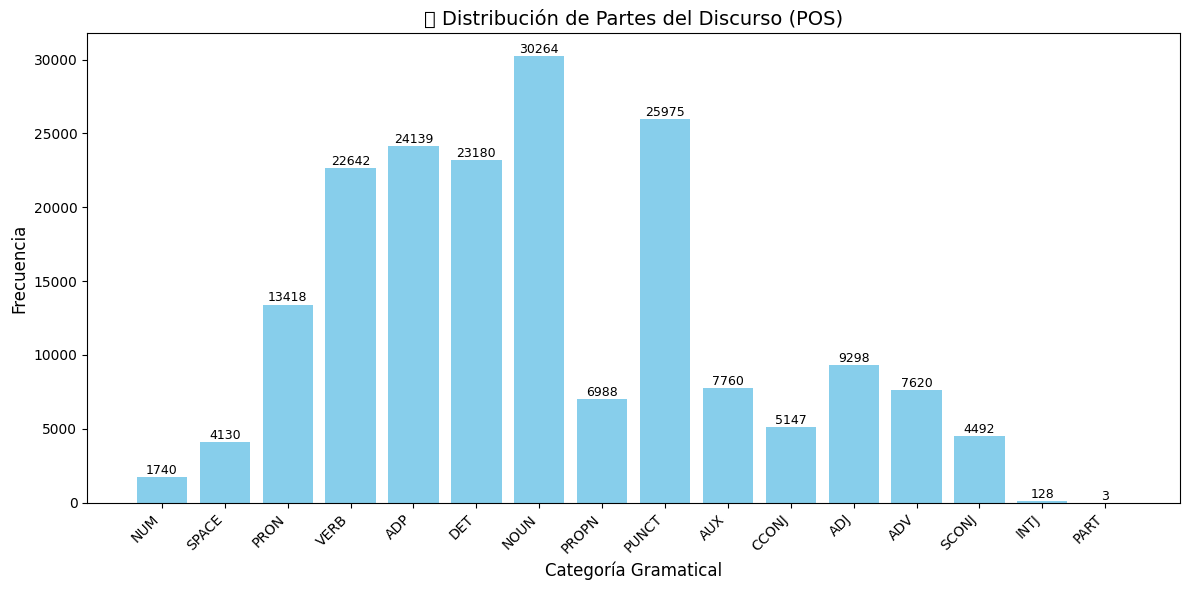

In [25]:
import matplotlib.pyplot as plt

labels, values = zip(*pos_counts.items())

plt.figure(figsize=(12, 6))
bars = plt.bar(labels, values, color='skyblue')
plt.title("📊 Distribución de Partes del Discurso (POS)", fontsize=14)
plt.xlabel("Categoría Gramatical", fontsize=12)
plt.ylabel("Frecuencia", fontsize=12)

# Mejoras visuales
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()  # Ajusta todo para que no se solapen los elementos

# Agrega etiquetas de valor sobre las barras si querés
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 2, str(height), ha='center', va='bottom', fontsize=9)

plt.show()


## **5. Reconocimiento de Entidades Nombradas (NER)**
## **Qué es:**
## Detecta entidades importantes como nombres de personas, lugares, fechas, organizaciones, etc.

## **Para qué sirve:**
## Es fundamental para tareas como extracción de información, motores de búsqueda inteligentes o asistentes virtuales.

In [26]:
# 🧾 5. Named Entity Recognition (NER)
entidades = [{"texto": ent.text, "tipo": ent.label_} for ent in doc.ents]

# Mostrar algunas entidades
for entidad in entidades[:10]:
    print(entidad)


{'texto': '1\r\n\r\n\r\nMe', 'tipo': 'MISC'}
{'texto': 'Eno', 'tipo': 'PER'}
{'texto': 'Un desayuno tardío', 'tipo': 'MISC'}
{'texto': 'Estaba mojado', 'tipo': 'MISC'}
{'texto': 'Nuevecita', 'tipo': 'ORG'}
{'texto': 'Una hilera de mesas', 'tipo': 'MISC'}
{'texto': 'Una puerta', 'tipo': 'MISC'}
{'texto': 'Había', 'tipo': 'PER'}
{'texto': 'Vi', 'tipo': 'MISC'}
{'texto': 'Las luces de emergencia', 'tipo': 'MISC'}


## **6. Palabras más frecuentes**
## **Qué es:**
## Contar qué palabras aparecen más veces en el texto después de limpiar el contenido.

## **Para qué sirve:**
## Ayuda a identificar temas principales o patrones en el texto. Es común en análisis exploratorios y visualización de texto.

In [27]:
# 📊 6. Palabras más frecuentes
from collections import Counter

frecuencia = Counter(tokens_filtrados).most_common(50)
for palabra, freq in frecuencia:
    print(f"{palabra}: {freq}")

.: 16056
,: 4614
?: 1403
Finlay: 506
Hubble: 422
dos: 386
Roscoe: 372
si: 335
bien: 316
puerta: 296
cabeza: 279
vez: 272
momento: 243
coche: 234
hombre: 232
hacia: 218
—dijo: 215
iba: 205
Kliner: 205
forma: 203
hacer: 192
Joe: 190
mismo: 184
años: 181
casa: 180
—No: 179
—dijo—: 173
tipo: 167
lado: 165
ser: 159
lugar: 159
gran: 153
mano: 148
hecho: 148
—dije—: 147
cosas: 146
dinero: 145
bajo: 144
Baker: 144
billetes: 141
Teale: 141
junto: 138
claro: 136
aquí: 136
silencio: 135
usted: 135
tan: 135
mujer: 133
posible: 132
dirección: 129


## **7. WordCloud (Nube de Palabras)**
## **Qué es:**
## Una visualización que muestra las palabras más frecuentes en tamaño proporcional a su frecuencia.

## **Para qué sirve:**
## Es una forma rápida y visual de entender de qué trata un texto sin leerlo todo.

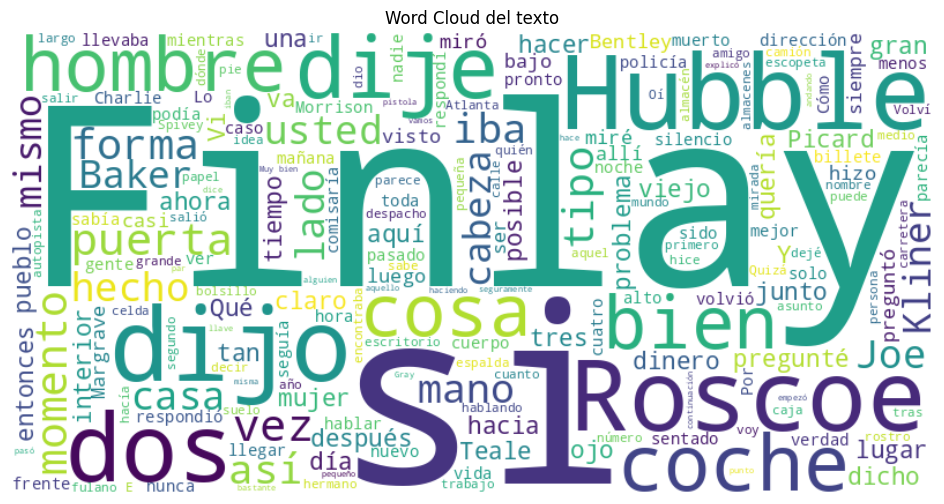

In [28]:
# ☁️ 7. WordCloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(tokens_filtrados))
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud del texto")
plt.show()

## **8. Bigramas / Trigramas (n-gramas)**
## **Qué es:**
## Son combinaciones de palabras consecutivas.
## Ejemplo: bigrama de “Don Quijote cabalgaba” → (“Don”, “Quijote”), (“Quijote”, “cabalgaba”).

## **Para qué sirve:**
## Permite detectar frases frecuentes y patrones en cómo se usan las palabras juntas. Muy usado en modelado de lenguaje, traducción y detección de estilo.

In [29]:
# 📛 8. Bigramas más frecuentes
from collections import Counter

# Crear bigramas correctamente (palabras consecutivas)
bigrams = list(zip(tokens_filtrados, tokens_filtrados[1:]))

# Contar frecuencia de los bigramas
bigrams_freq = Counter(bigrams).most_common(10)

# Guardar los resultados en una variable
bigrams_mas_frecuentes = [{"bigrama": bg, "frecuencia": freq} for bg, freq in bigrams_freq]

# Mostrar los bigramas
for item in bigrams_mas_frecuentes:
    print(f"{item['bigrama']}: {item['frecuencia']}")


('.', 'Finlay'): 209
('—dijo—', '.'): 171
('cabeza', '.'): 164
('.', 'Roscoe'): 149
('—dije—', '.'): 147
('Finlay', '.'): 130
('.', '—No'): 128
('?', '—preguntó'): 116
('.', 'Si'): 114
('.', 'Hubble'): 113


## **🧩 ¿Cómo ver frases completas?**

In [30]:
import spacy

# Cargar el modelo en español
nlp = spacy.load("es_core_news_sm")

# Procesar el texto completo
doc = nlp(libro)

# Extraer todas las oraciones
oraciones = [sent.text.strip() for sent in doc.sents]

# Mostrar las primeras 10 oraciones
for i, oracion in enumerate(oraciones[:10]):
    print(f"{i+1}: {oracion}")



1: 1


Me detuvieron en la cafetería de Eno.
2: A las doce del mediodía.
3: Estaba comiendo unos huevos y bebiendo café.
4: Un desayuno tardío, no un almuerzo.
5: Estaba mojado y exhausto después de una larga caminata bajo la intensa lluvia.
6: Desde la autopista hasta el límite municipal.
7: La cafetería era pequeña, pero limpia y luminosa.
8: Nuevecita, construida a imitación de un vagón de tren.
9: Estrecha, con una larga barra a un lado y una cocina encajonada al fondo.
10: Una hilera de mesas con bancos de respaldo alto al otro lado.


## **1 🧠 Palabras clave de pelea.**



In [31]:
palabras_pelea = ["pelea", "golpear", "golpeó", "puñetazo", "disparo", "disparó",
                  "patada", "empujó", "empujón", "estranguló", "golpes", "agresión",
                  "violencia", "derribó", "lucha", "forcejeo", "combate"]


## **🔧 Código completo para detectar peleas por capítulo**

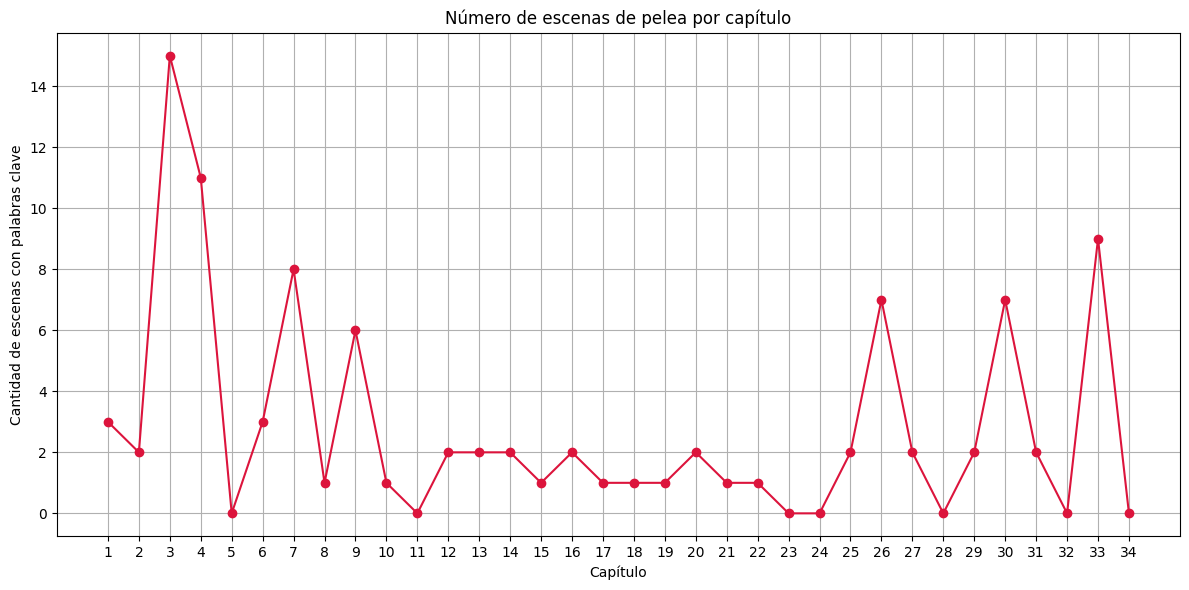

In [32]:
import spacy
import matplotlib.pyplot as plt

# Cargar modelo de spaCy en español
nlp = spacy.load("es_core_news_sm")

# Palabras clave
palabras_pelea = ["pelea", "golpear", "golpeó", "puñetazo", "disparo", "disparó",
                  "patada", "empujó", "empujón", "estranguló", "golpes", "agresión",
                  "violencia", "derribó", "lucha", "forcejeo", "combate"]

# Separar por capítulos (suponiendo que empiezan con "CAPÍTULO" o número)
import re

# Divide cuando encuentra un número entero al principio de una línea (capítulo nuevo)
capitulos = re.split(r'\n\s*\d+\s*\n', libro)
capitulos = [c.strip() for c in capitulos if len(c.strip()) > 100]  # eliminamos capítulos vacíos


# Guardar cantidad de frases con pelea por capítulo
conteo_pelea_por_capitulo = []
frases_pelea = []

for cap in capitulos:
    doc = nlp(cap)
    oraciones = [sent.text.strip() for sent in doc.sents]
    frases = [frase for frase in oraciones if any(pal in frase.lower() for pal in palabras_pelea)]
    frases_pelea.append(frases)  # para verlas después si querés
    conteo_pelea_por_capitulo.append(len(frases))

# 📊 Graficar
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(conteo_pelea_por_capitulo)+1), conteo_pelea_por_capitulo, marker='o', color='crimson')
plt.title("Número de escenas de pelea por capítulo")
plt.xlabel("Capítulo")
plt.ylabel("Cantidad de escenas con palabras clave")
plt.xticks(range(1, len(conteo_pelea_por_capitulo)+1))
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
# Mostrar las frases de pelea por capítulo
for i, frases in enumerate(frases_pelea, 1):  # empieza en 1
    print(f"📘 Capítulo {i}")
    for frase in frases:
        print(f" - {frase}")
    print("\n" + "="*80 + "\n")


📘 Capítulo 1
 - Situado demasiado cerca, el revólver podía no dar en el blanco en caso de que hubiera lucha, y un disparo de escopeta desde la puerta acabaría conmigo, pero de propina mataría al agente encargado de la detención y al viejo de la mesa del fondo.
 - Un disparo al techo, quizá, y un buen codazo en la cara del policía, y la escopeta muy bien podría ser mía.
 - Una mano en mi espalda me empujó a través de la puerta.


📘 Capítulo 2
 - Baker golpeó en la puerta con los nudillos.
 - Dio dos golpes en la puerta con los nudillos.


📘 Capítulo 3
 - Levantó la mirada un momento y prosiguió:

—La víctima recibió dos disparos en la cabeza.
 - El primer disparo fue hecho de muy cerca, en la sien izquierda.
 - El primer disparo seguramente fue mortal de necesidad.
 - —Su primer disparo lo mató —dijo Baker—.
 - Le disparó una segunda vez, y entonces perdió el control y se puso a patear el cadáver hasta dejarlo machacado.
 - Primero le disparó y luego hizo lo posible por destrozarlo a pa

## **2 🧠 Palabras clave de Muertes.**

In [53]:
# Palabras clave

palabras_muertes = ["el amor"]

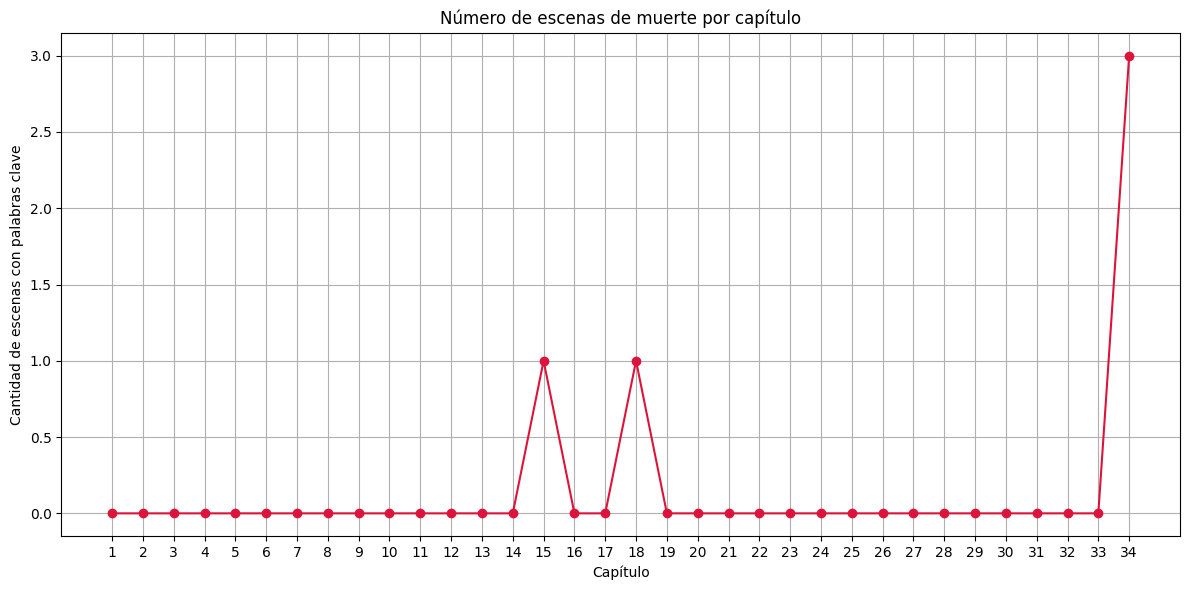

In [54]:


# Guardar cantidad de frases con muerte por capítulo
conteo_muertes_por_capitulo = []
frases_muerte = []

for cap in capitulos:
    doc = nlp(cap)
    oraciones = [sent.text.strip() for sent in doc.sents]
    frases = [frase for frase in oraciones if any(pal in frase.lower() for pal in palabras_muertes)]
    frases_muerte.append(frases)  # para verlas después si querés
    conteo_muertes_por_capitulo.append(len(frases))

# 📊 Graficar
plt.figure(figsize=(12, 6))
plt.plot(range(1, len(conteo_muertes_por_capitulo)+1), conteo_muertes_por_capitulo, marker='o', color='crimson')
plt.title("Número de escenas de muerte por capítulo")
plt.xlabel("Capítulo")
plt.ylabel("Cantidad de escenas con palabras clave")
plt.xticks(range(1, len(conteo_muertes_por_capitulo)+1))
plt.grid(True)
plt.tight_layout()
plt.show()

In [56]:
# Mostrar solo capítulos con frases de pelea
for i, frases in enumerate(frases_muerte, 1):  # empieza en 1
    if frases:  # Solo mostrar si hay frases
        print(f"📘 Capítulo {i}")
        for frase in frases:
            print(f" - {frase}")
        print("\n" + "="*80 + "\n")


📘 Capítulo 15
 - Acabamos por hacer el amor con frenesí en el suelo del dormitorio.


📘 Capítulo 18
 - Terminamos por hacer el amor en la ducha mientras el agua caía sobre nuestros cuerpos.


📘 Capítulo 34
 - Hicimos el amor con gran ternura, con gran energía, con gran alegría.
 - Volvimos a hacer el amor.
 - Nunca antes habíamos hecho el amor tan bien.




# **Analisis de Sentimientos por Oración**

## **✅ Carga del modelo de sentimientos**

In [37]:
from transformers import pipeline
from spacy.lang.es import Spanish

# Cargar el modelo de sentimiento en español
sentiment_pipeline = pipeline("sentiment-analysis", model="nlptown/bert-base-multilingual-uncased-sentiment")

# Cargar el NLP de spaCy para español
nlp = Spanish()
nlp.add_pipe("sentencizer")  # Solo segmenta en oraciones

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/953 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/669M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/39.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/872k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


## **✅ Paso 4: Analizar sentimientos por oración**


In [ ]:
sentimientos_por_capitulo = []

for oraciones in oraciones:
    sentimientos = []
    for oracion in oraciones:
        try:
            result = sentiment_pipeline(oracion[:512])  # límite de tokens
            sentimientos.append({
                'oracion': oracion,
                'sentimiento': result[0]['label'],
                'score': result[0]['score']
            })
        except Exception as e:
            print(f"Error con oración: {oracion}\n{e}")
    sentimientos_por_capitulo.append(sentimientos)


## **✅  Ver resultados**


In [ ]:
for i, cap in enumerate(sentimientos_por_capitulo, 1):
    print(f"📘 Capítulo {i}")
    for s in cap[:5]:  # Las primeras 5 oraciones
        print(f"{s['oracion']} → {s['sentimiento']} ({s['score']:.2f})")
    print("\n" + "="*80 + "\n")


#///////////////////////////////

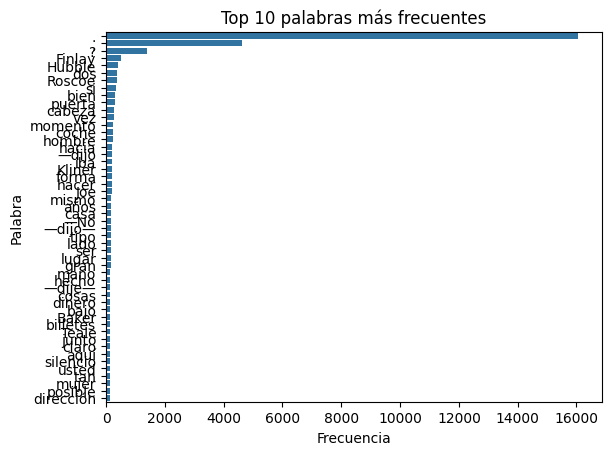

In [14]:
import seaborn as sns
import pandas as pd

palabras_df = pd.DataFrame(frecuencia, columns=['palabra', 'frecuencia'])
sns.barplot(data=palabras_df, x='frecuencia', y='palabra')
plt.title("Top 10 palabras más frecuentes")
plt.xlabel("Frecuencia")
plt.ylabel("Palabra")
plt.show()

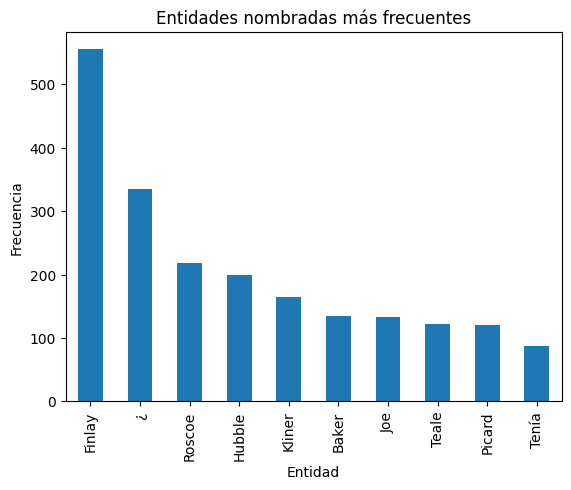

In [15]:
ents = [ent.text for ent in doc.ents if ent.label_ in ['PER', 'LOC', 'ORG']]
ent_freq = Counter(ents).most_common(10)
pd.DataFrame(ent_freq, columns=["Entidad", "Frecuencia"]).plot.bar(x='Entidad', y='Frecuencia', legend=False)
plt.title("Entidades nombradas más frecuentes")
plt.ylabel("Frecuencia")
plt.show()

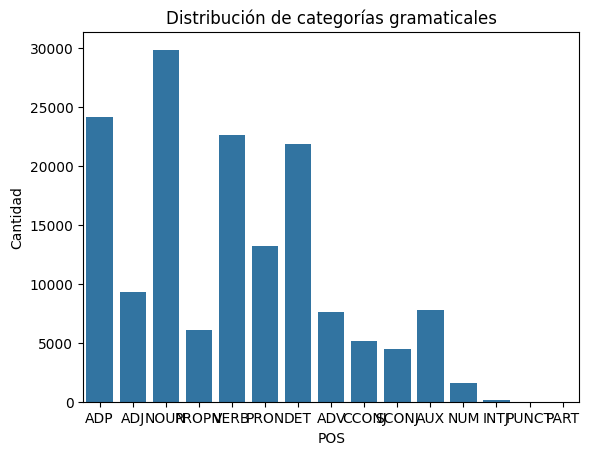

In [16]:
from collections import Counter
pos_counts = Counter([token.pos_ for token in doc if token.is_alpha])
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()))
plt.title("Distribución de categorías gramaticales")
plt.xlabel("POS")
plt.ylabel("Cantidad")
plt.show()


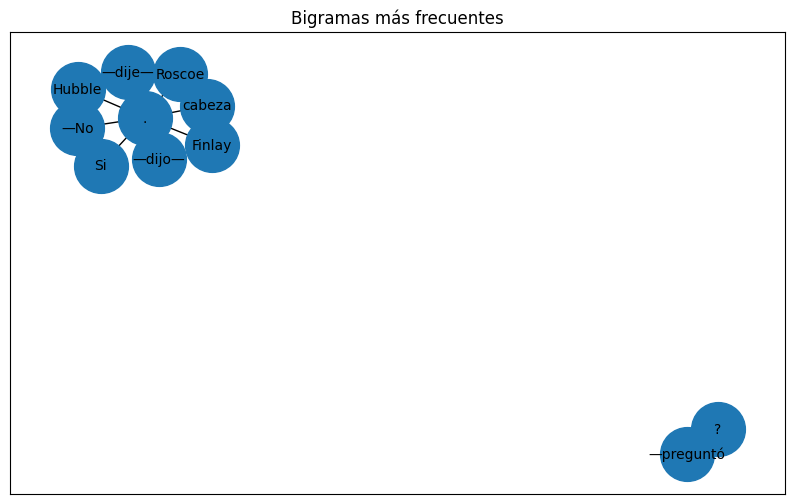

In [17]:
import networkx as nx

G = nx.Graph()
for (w1, w2), freq in bigrams_freq:
    G.add_edge(w1, w2, weight=freq)

plt.figure(figsize=(10,6))
nx.draw_networkx(G, with_labels=True, node_size=1500, font_size=10)
plt.title("Bigramas más frecuentes")
plt.show()




In [19]:
from textblob import TextBlob

# Assuming 'tokens_limpios' from previous cell contains the processed text
texto_procesado = ' '.join(tokens_filtrados)  # Join the tokens into a string

# Análisis de sentimientos por párrafo o línea
sentimientos = []
for frase in texto_procesado.split('\n'):
    blob = TextBlob(frase)
    sentimientos.append((frase, blob.sentiment.polarity))

# Mostrar las frases más positivas y más negativas
sentimientos_ordenados = sorted(sentimientos, key=lambda x: x[1])
print("Frase más negativa:\n", sentimientos_ordenados[0])
print("\nFrase más positiva:\n", sentimientos_ordenados[-1])


Frase más negativa:
 ('primera vista , Margrave parece pueblos apacibles nunca pasa . Jack Reacher , exmilitar convertido trotamundos , acaba llegar allí tarda menos hora comprobar apariencias engañan . Detenido mientras desayunaba cafetería , Reacher , único forastero ciudad , acusado asesinato . pesar inocencia , indicios empiezan acumularse . Si quiere escapar vida nido serpientes encuentra , aguzar demostrar superviviente nato . Lee Child Zona peligrosa Jack Reacher - 1 ePub r1.3 Titivillus 11.06.15 Título original : Killing floor Lee Child , 1997 Traducción : Antonio Padilla Esteban Ilustraciones : Newcomlab S.L.L . Editor digital : Titivillus ePub base r1.2 agente Darley Anderson , Londres ; editores David Highfill , Nueva York , Marianne Velmans , Londres . emplearon fondo concederle oportunidad escritor . libro dedicado tres , agradecimiento esfuerzos , ido allá requería deber . 1 detuvieron cafetería Eno . doce mediodía . comiendo huevos bebiendo café . desayuno tardío , almue

In [20]:

from nltk.sentiment import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sia = SentimentIntensityAnalyzer()

sentimientos = []
for frase in texto_procesado.split('\n'):
    score = sia.polarity_scores(frase)['compound']
    sentimientos.append((frase, score))

# Frases con sentimiento más marcado
sentimientos_ordenados = sorted(sentimientos, key=lambda x: x[1])
print("Frase más negativa:\n", sentimientos_ordenados[0])
print("\nFrase más positiva:\n", sentimientos_ordenados[-1])


[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


Frase más negativa:
 ('primera vista , Margrave parece pueblos apacibles nunca pasa . Jack Reacher , exmilitar convertido trotamundos , acaba llegar allí tarda menos hora comprobar apariencias engañan . Detenido mientras desayunaba cafetería , Reacher , único forastero ciudad , acusado asesinato . pesar inocencia , indicios empiezan acumularse . Si quiere escapar vida nido serpientes encuentra , aguzar demostrar superviviente nato . Lee Child Zona peligrosa Jack Reacher - 1 ePub r1.3 Titivillus 11.06.15 Título original : Killing floor Lee Child , 1997 Traducción : Antonio Padilla Esteban Ilustraciones : Newcomlab S.L.L . Editor digital : Titivillus ePub base r1.2 agente Darley Anderson , Londres ; editores David Highfill , Nueva York , Marianne Velmans , Londres . emplearon fondo concederle oportunidad escritor . libro dedicado tres , agradecimiento esfuerzos , ido allá requería deber . 1 detuvieron cafetería Eno . doce mediodía . comiendo huevos bebiendo café . desayuno tardío , almue

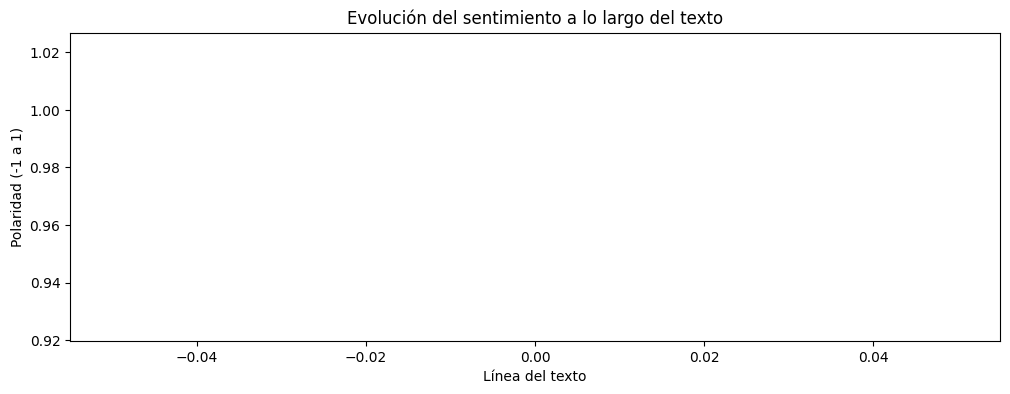

In [21]:
import matplotlib.pyplot as plt

polaridades = [s[1] for s in sentimientos]
plt.figure(figsize=(12, 4))
plt.plot(polaridades)
plt.title("Evolución del sentimiento a lo largo del texto")
plt.xlabel("Línea del texto")
plt.ylabel("Polaridad (-1 a 1)")
plt.show()


In [35]:
pip install transformers torch


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 99.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 81.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitlin

In [34]:
import re
from transformers import pipelinefrom collections import Counter
import matplotlib.pyplot as plt
from sumy.parsers.plaintext import PlaintextParser
from sumy.nlp.tokenizers import Tokenizer
from sumy.summarizers.lsa import LsaSummarizer

# --- 1. Separar el libro por capítulos ---
def separar_capitulos(texto):
    # Suponemos que los capítulos empiezan con "Capítulo", "CAPÍTULO", o un número solo
    caps = re.split(r'\bCap[ií]tulo\s+\d+\b', texto, flags=re.IGNORECASE)
    capitulos = [cap.strip() for cap in caps if len(cap.strip()) > 200]  # filtramos los vacíos
    return capitulos

capitulos = separar_capitulos(libro)
print(f"Cantidad de capítulos encontrados: {len(capitulos)}")

# --- 2. Resumen por capítulo ---
def resumir_texto(texto, num_oraciones=3):
    parser = PlaintextParser.from_string(texto, Tokenizer("spanish"))
    summarizer = LsaSummarizer()
    resumen = summarizer(parser.document, num_oraciones)
    return " ".join(str(oracion) for oracion in resumen)

resumenes = [resumir_texto(cap) for cap in capitulos]

# --- 3. Sentimiento por capítulo ---
sentimientos = []
for cap in capitulos:
    polaridad, subjetividad = pattern_sentiment(cap) # pattern_sentiment is used
    sentimientos.append(polaridad)

# --- 4. Buscar menciones de peleas ---
palabras_pelea = ["golpe", "disparo", "pelea", "lucha", "patada", "puñetazo", "forcejeo"]
conteo_pelea = []

for cap in capitulos:
    texto_min = cap.lower()
    count = sum(texto_min.count(p) for p in palabras_pelea)
    conteo_pelea.append(count)

# --- 5. Gráfico de sentimientos y peleas ---
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(sentimientos, marker='o', color='blue')
plt.title("Sentimiento por capítulo (polaridad)")
plt.xlabel("Capítulo")
plt.ylabel("Polaridad (más positivo → más alto)")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.bar(range(len(conteo_pelea)), conteo_pelea, color='red')
plt.title("Cantidad de peleas por capítulo")
plt.xlabel("Capítulo")
plt.ylabel("Menciones relacionadas a pelea")
plt.grid(True)

plt.tight_layout()
plt.show()

IndentationError: expected an indented block after 'try' statement on line 35 (tree.py, line 37)